In [1]:
import pandas

In [2]:
em_data = pandas.read_csv('../data/pp_gas_emission/gt_2011.csv.gz')

In [3]:
em_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
7406,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.51860,79.559
7407,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.84700,79.917
7408,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.96320,90.912
7409,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.24940,93.227


In [4]:
em_data = (em_data - em_data.mean()) / em_data.std()

In [5]:
em_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.686045,0.720184,0.334178,-0.778036,-0.389456,0.090864,0.642679,-0.066362,-0.270006,-0.675099,1.345705
1,-1.725704,0.656621,0.375765,-0.785439,-0.395928,0.084666,0.669222,-0.066362,-0.275239,-0.609418,1.385486
2,-1.778031,0.672512,0.422030,-0.767460,-0.386913,0.109457,0.686113,-0.039834,-0.144413,-0.607467,1.516438
3,-1.799692,0.656621,0.464805,-0.770482,-0.405175,0.109457,0.683700,-0.044152,-0.189766,-0.726880,1.397467
4,-1.798615,0.577168,0.446091,-0.774561,-0.403788,0.072271,0.663190,-0.066362,-0.259540,-0.707156,1.352818
...,...,...,...,...,...,...,...,...,...,...,...
7406,-1.088022,-1.361493,1.432137,-0.828953,-1.502536,-2.171303,0.205928,-1.489012,-1.576522,1.596427,1.121711
7407,-1.241785,-1.313821,1.479145,-0.883647,-1.444743,-2.382025,-0.154814,-1.478524,-1.547740,1.774379,1.155221
7408,-1.325680,-1.250259,1.509072,-0.927311,-1.417928,-2.915029,-0.866646,-1.576617,-1.504131,3.462972,2.184394
7409,-1.360507,-1.170806,1.472832,-0.970220,-1.453297,-2.574154,-0.393700,-1.542685,-1.460523,2.534306,2.401087


<AxesSubplot:xlabel='AT', ylabel='NOX'>

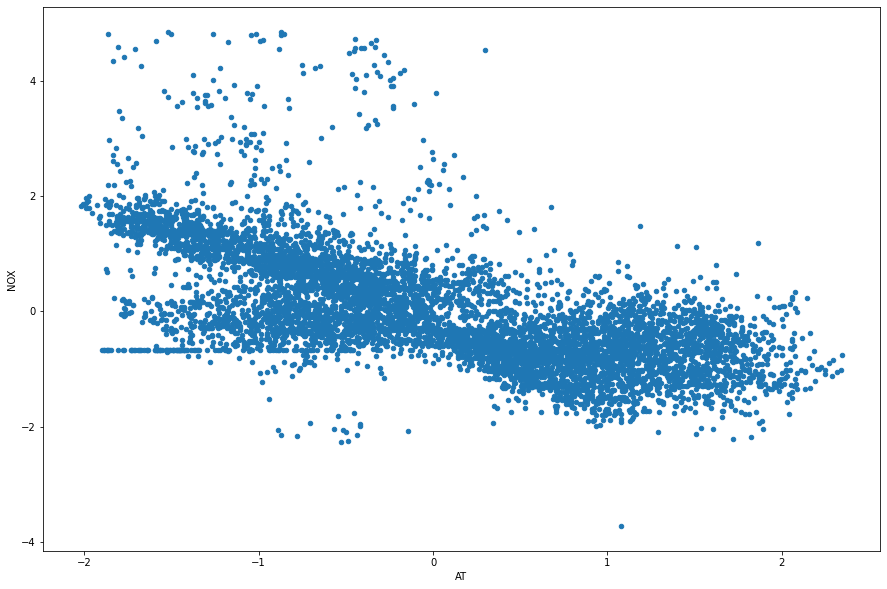

In [48]:
em_data.plot.scatter('AT', 'NOX', figsize=(15, 10))

<AxesSubplot:ylabel='Frequency'>

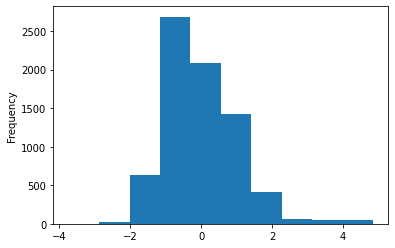

In [6]:
em_data['NOX'].plot.hist()

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
em_valdiation_data = em_data.sample(frac = 0.2)

In [9]:
em_training_data = em_data.drop(em_valdiation_data.index)

In [10]:
em_training_label = em_training_data.pop('NOX')

In [11]:
em_valdiation_label = em_valdiation_data.pop('NOX')

In [13]:
k = len(em_training_data.keys())

In [14]:
k

10

In [36]:
em_model = keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=[k]),
    layers.Dropout(0.3),
    layers.Dense(8, activation='elu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='linear')
])

In [37]:
optimizer = keras.optimizers.SGD()

In [38]:
em_model.compile(loss='mse',
                 optimizer=optimizer,
                metrics=['mae', 'mse'])

In [39]:
em_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                176       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
Total params: 384
Trainable params: 384
Non-trainable params: 0
_________________________________________________________________


In [44]:
EPOCHS = 20

history = em_model.fit(em_training_data, em_training_label, epochs=EPOCHS, validation_split=0.2, batch_size=10)

Epoch 1/20
475/475 [==============================] - 0s 757us/step - loss: 0.2562 - mae: 0.3409 - mse: 0.2562 - val_loss: 0.7064 - val_mae: 0.4401 - val_mse: 0.7064
Epoch 2/20
475/475 [==============================] - 0s 645us/step - loss: 0.2547 - mae: 0.3380 - mse: 0.2547 - val_loss: 0.6960 - val_mae: 0.4261 - val_mse: 0.6960
Epoch 3/20
475/475 [==============================] - 0s 647us/step - loss: 0.2604 - mae: 0.3418 - mse: 0.2604 - val_loss: 0.7449 - val_mae: 0.4543 - val_mse: 0.7449
Epoch 4/20
475/475 [==============================] - 0s 642us/step - loss: 0.2666 - mae: 0.3421 - mse: 0.2666 - val_loss: 0.7411 - val_mae: 0.4627 - val_mse: 0.7411
Epoch 5/20
475/475 [==============================] - 0s 641us/step - loss: 0.2516 - mae: 0.3355 - mse: 0.2516 - val_loss: 0.6401 - val_mae: 0.4248 - val_mse: 0.6401
Epoch 6/20
475/475 [==============================] - 0s 646us/step - loss: 0.2575 - mae: 0.3335 - mse: 0.2575 - val_loss: 0.6585 - val_mae: 0.4255 - val_mse: 0.6585
Epoc

In [45]:
hist_df = pandas.DataFrame(history.history)

In [46]:
hist_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,0.256182,0.340948,0.256182,0.706432,0.440060,0.706432
1,0.254733,0.337975,0.254733,0.695958,0.426130,0.695958
2,0.260368,0.341758,0.260368,0.744934,0.454261,0.744934
3,0.266649,0.342060,0.266649,0.741117,0.462673,0.741117
4,0.251593,0.335456,0.251593,0.640143,0.424813,0.640143
5,0.257530,0.333522,0.257530,0.658549,0.425464,0.658549
6,0.255771,0.333916,0.255771,0.730851,0.467530,0.730851
7,0.252838,0.338588,0.252838,0.651295,0.424062,0.651295
8,0.246521,0.333163,0.246521,0.631253,0.423322,0.631253
9,0.254163,0.337631,0.254163,0.608119,0.404386,0.608119


<AxesSubplot:>

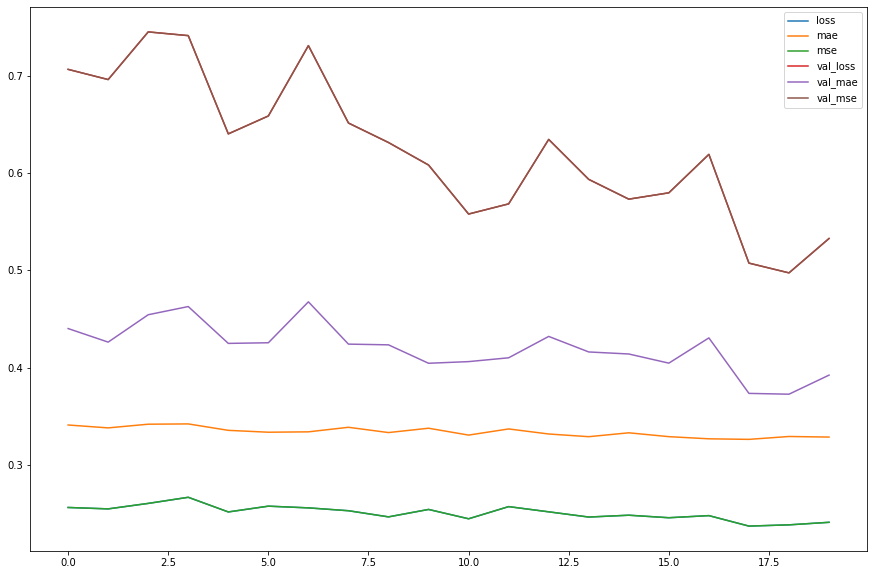

In [47]:
hist_df.plot(figsize=(15, 10))

In [ ]:
em_model.predict